# speech recognition practices

## Displaying Signals 

importing library

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

declering the path of the audio file

In [3]:
path = "Conference.wav"
ipd.Audio(path)

load is a fucntion that could load the file and sr is our sampling Frequency 

In [11]:
samples, sr = librosa.load(path, sr=22050)
# samples.size is the number of our samples
samples.size

112896

Displaying the waves

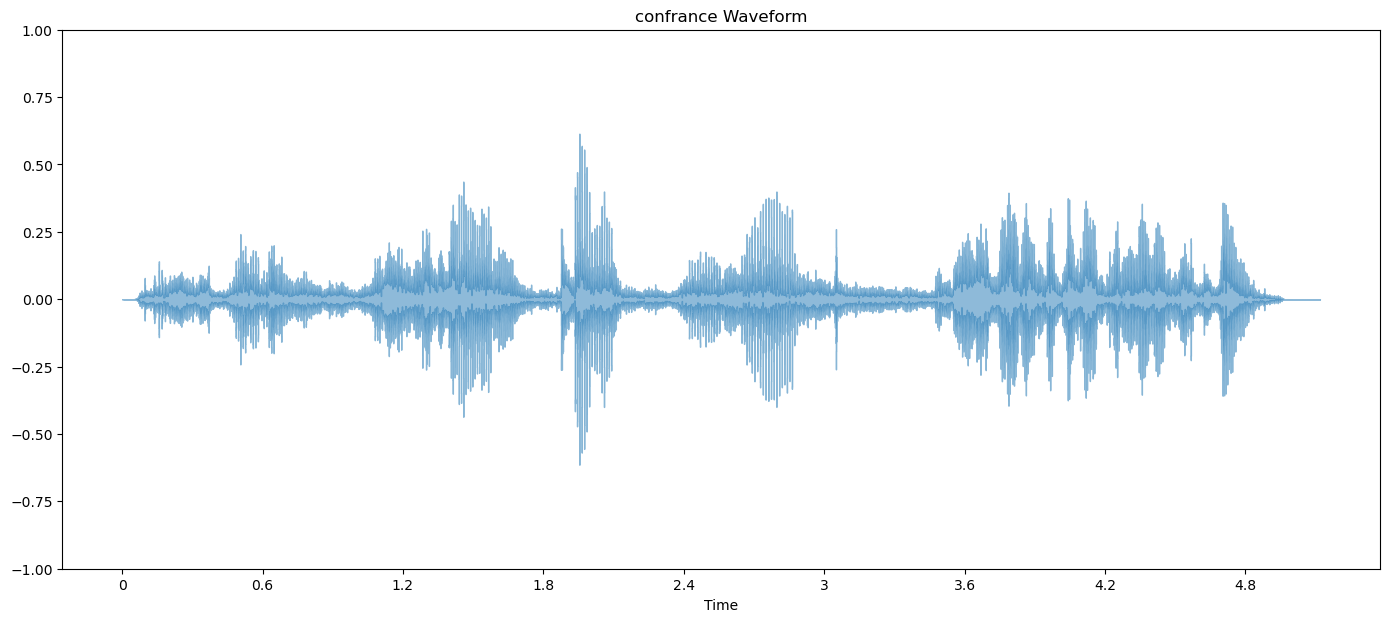

In [13]:
import librosa.display

plt.figure(figsize = (17, 7))
librosa.display.waveshow(samples, sr=22050, alpha = 0.5)
plt.title("confrance Waveform")
plt.ylim((-1, 1))
plt.show()

Plotting Spectrogram

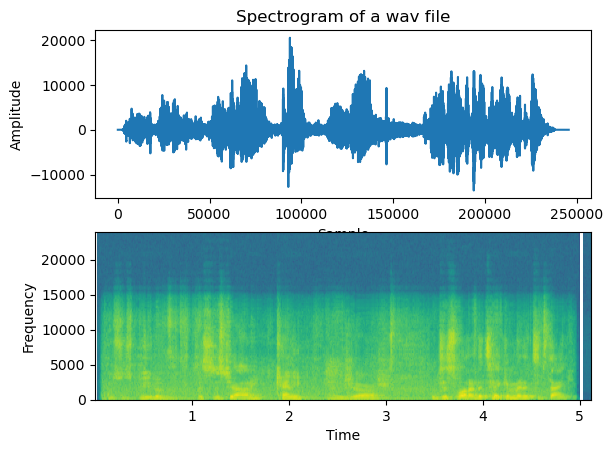

In [3]:
import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file 
samplingFrequency, signalData = wavfile.read('Conference.wav')

# Plot the signal read from wav file
plot.subplot(211)
plot.title('Spectrogram of a wav file')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')

 
plot.subplot(212)
plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.show()

## Extracting Features 

In [14]:
frame_size = 1024
shift_size = 512

In [19]:
def plot_feature(feature, sr, hop_length, title="Feature",  waveform = None, ylim = (-1, 1)):
    frames = range(0, len(feature))
    t = librosa.frames_to_time(frames, sr = sr, hop_length=shift_size)

    plt.figure(figsize = (15, 6))
    if waveform is not None:
        librosa.display.waveshow(waveform, sr=sr, alpha = 0.5)
    plt.plot(t, feature, color = "r")
    plt.title(title)
    plt.ylim(ylim)
    plt.show()

###  Root-Mean-Square Energy (RMS):

In [21]:
rms_feature = librosa.feature.rms(y =samples, frame_length=frame_size, hop_length=shift_size)[0]
rms_feature.shape

(221,)

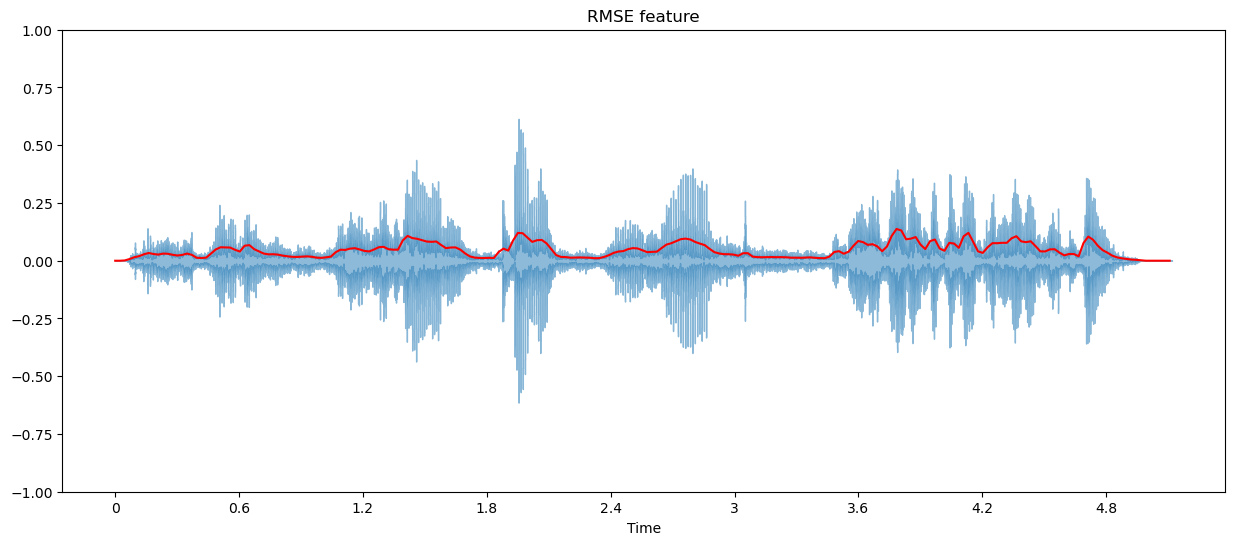

In [22]:
plot_feature(rms_feature, sr, shift_size, title= "RMSE feature", waveform = samples)

### Zero crossing rate (ZCR):

In [15]:
zcr_feature = librosa.feature.zero_crossing_rate(samples, frame_length=frame_size, hop_length=shift_size)[0]
zcr_feature.shape

(221,)

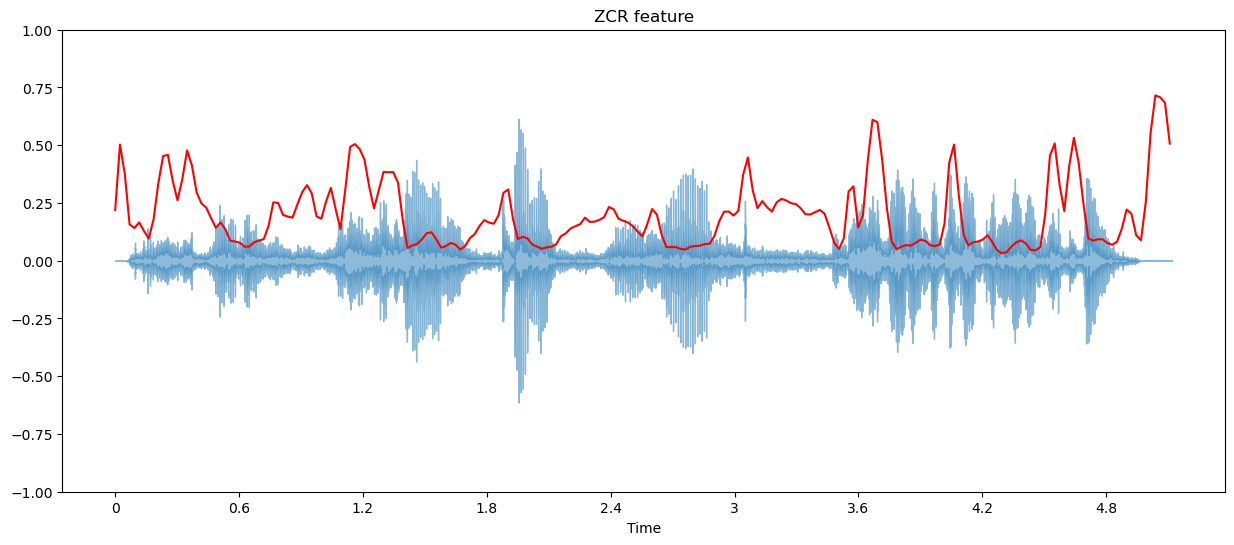

In [20]:
plot_feature(zcr_feature, sr, shift_size, "ZCR feature", waveform = samples)